In [1]:
!unzip '/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip '/content/train.zip'
!unzip '/content/test1.zip'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
from PIL import Image
import cv2
from tqdm import tqdm

In [4]:
train_data_path = '/content/train'
train_image_path = glob(train_data_path + '/*.jpg')

In [5]:
names = []
labels = []

for path in train_image_path:
  name= path.split('/content/train/')[1]
  names.append(name)
  labels.append(name.split('.')[0])

In [6]:
train_dataset = {"path":train_image_path,"name":names,"label":labels}   #{'path': ['/content/train/dog.2200.jpg', '/content/train/dog.7226.jpg', '/content/train/dog.11782.jpg',...
df_train_dataset = pd.DataFrame(train_dataset)
df_train_dataset.head(10)

,path,name,label
0,/content/train/cat.3780.jpg,cat.3780.jpg,cat
1,/content/train/cat.11677.jpg,cat.11677.jpg,cat
2,/content/train/dog.2159.jpg,dog.2159.jpg,dog
3,/content/train/dog.8164.jpg,dog.8164.jpg,dog
4,/content/train/cat.12279.jpg,cat.12279.jpg,cat
5,/content/train/cat.5685.jpg,cat.5685.jpg,cat
6,/content/train/cat.8308.jpg,cat.8308.jpg,cat
7,/content/train/cat.9393.jpg,cat.9393.jpg,cat
8,/content/train/dog.8578.jpg,dog.8578.jpg,dog
9,/content/train/dog.5932.jpg,dog.5932.jpg,dog


In [7]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(100,100,3),
                                               include_top= False,
                                               weights="imagenet",


)

9406464/9406464 [==============================] - 0s 0us/step


In [8]:
base_model.trainable = False

In [10]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 50, 50, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 50, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 50, 50, 32)   0           ['bn_Conv1[0][

Build/design the model

In [17]:
input = tf.keras.Input(shape=(100,100,3))
x = base_model(input)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(32,activation="relu")(x)
output = tf.keras.layers.Dense(2,"softmax")(x)

model = tf.keras.Model(input,output)

In [19]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer="adam", metrics=["accuracy"])

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 32)                40992     
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,299,042
Trainable params: 41,058
Non-trainabl

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [23]:
train_data_generator = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
                                          )

train_generator = train_data_generator.flow_from_dataframe(
    df_train_dataset[0:20000],
    '/content/train',
    x_col = "name",
    y_col = "label",
    target_size = (100,100),
    class_mode = "categorical",
    batch_size = 128


)

Found 20000 validated image filenames belonging to 2 classes.


In [24]:
validation_data_generator = ImageDataGenerator(
    rescale=1./255,
                                          )

validation_generator = validation_data_generator.flow_from_dataframe(
    df_train_dataset[20000:25000],
    '/content/train',
    x_col = "name",
    y_col = "label",
    target_size = (100,100),
    class_mode = "categorical",
    batch_size = 64


)

Found 5000 validated image filenames belonging to 2 classes.


In [25]:
epoch = 10
history = model.fit(train_generator, epochs=epoch, steps_per_epoch= 20000/128, validation_data = validation_generator, validation_steps=5000/64 )

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
156/156 [==============================] - 110s 626ms/step - loss: 0.2891 - accuracy: 0.8709 - val_loss: 0.2009 - val_accuracy: 0.9084
Epoch 2/10
156/156 [==============================] - 101s 646ms/step - loss: 0.2450 - accuracy: 0.8913 - val_loss: 0.2015 - val_accuracy: 0.9130
Epoch 3/10
156/156 [==============================] - 87s 557ms/step - loss: 0.2340 - accuracy: 0.8986 - val_loss: 0.2017 - val_accuracy: 0.9156
Epoch 4/10
156/156 [==============================] - 83s 532ms/step - loss: 0.2248 - accuracy: 0.9010 - val_loss: 0.2160 - val_accuracy: 0.9070
Epoch 5/10
156/156 [==============================] - 86s 550ms/step - loss: 0.2201 - accuracy: 0.9035 - val_loss: 0.1929 - val_accuracy: 0.9150
Epoch 6/10
156/156 [==============================] - 83s 530ms/step - loss: 0.2175 - accuracy: 0.9064 - val_loss: 0.1830 - val_accuracy: 0.9198
Epoch 7/10
156/156 [==============================] - 84s 539ms/step - loss: 0.2187 - accuracy: 0.9051 - val_loss: 0.1746 - val_

In [27]:
def plot_graphs(fitted_model, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

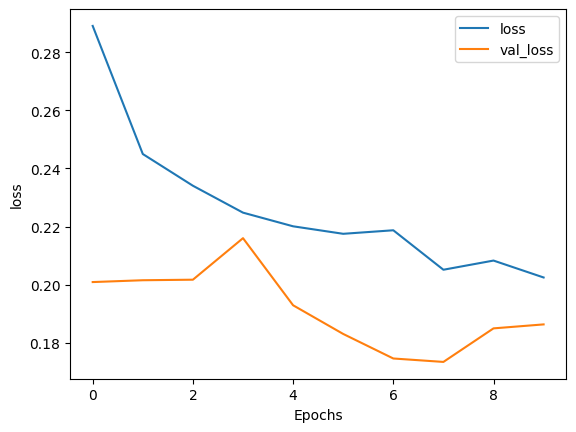

In [28]:
plot_graphs(fitted_model=history, metric='loss')

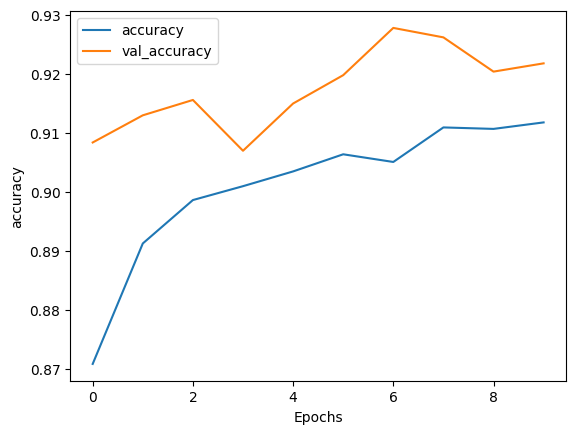

In [29]:
plot_graphs(fitted_model = history, metric = 'accuracy')

In [30]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = './saved_model'
save_model(model, filepath)

# Load the model
model = load_model(filepath, compile = True)

In [31]:
test_data_path = '/content/test1'
test_image_path = glob(test_data_path + '/*.jpg')

In [32]:
names = []

for path in test_image_path:
  name= path.split('/content/test1/')[1]
  names.append(name)

In [33]:
test_dataset = {"path":test_image_path, "name":names}
df_test_dataset = pd.DataFrame(test_dataset)
df_test_dataset.head(5)

,path,name
0,/content/test1/11903.jpg,11903.jpg
1,/content/test1/10052.jpg,10052.jpg
2,/content/test1/8818.jpg,8818.jpg
3,/content/test1/1621.jpg,1621.jpg
4,/content/test1/6994.jpg,6994.jpg


In [34]:
test_data_generator = ImageDataGenerator(
    rescale=1./255,
                                          )

test_generator = test_data_generator.flow_from_dataframe(
    df_test_dataset,
    '/content/test1',
    x_col = "name",
    y_col = None,
    target_size = (100,100),
    class_mode = None,
    batch_size = 128,
    shuffle = False

)

Found 12500 validated image filenames.


In [35]:
predicted_result = model.predict_generator(test_generator, steps = 12500/128)

<ipython-input-35-9e0ab698fe57>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted_result = model.predict_generator(test_generator, steps = 12500/128)


In [36]:
print(predicted_result[0])

[9.9938023e-01 6.1969808e-04]


In [37]:
def class_title(predicted_result, example):
  selected_class = np.argmax(predicted_result[example])
  if selected_class == 0:
    selected_class = "cat"
  else:
    selected_class = "dog"
  return selected_class

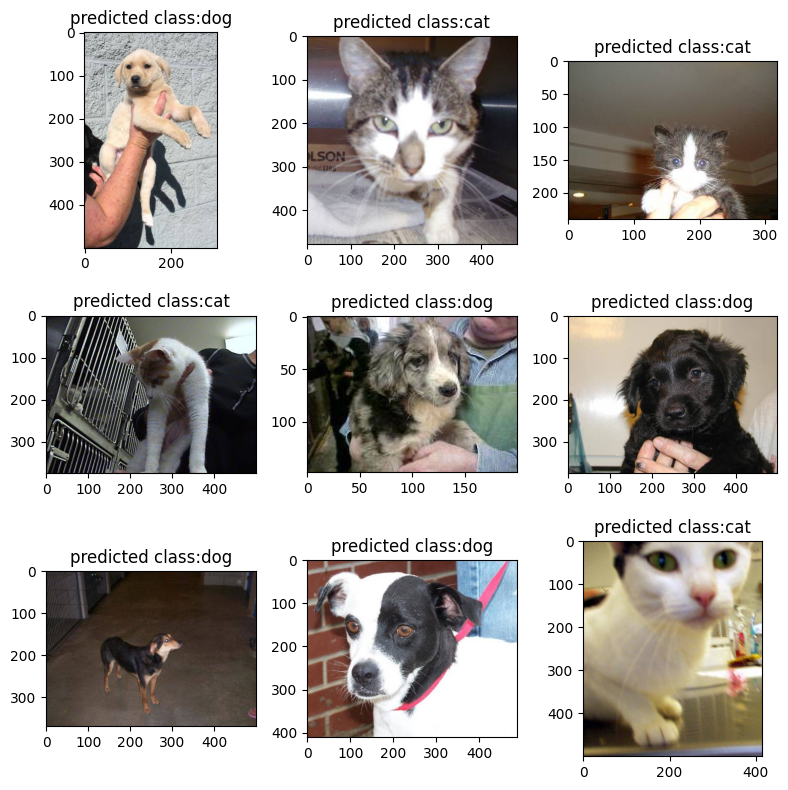

In [38]:
plt.figure(figsize=(8, 8))

for i in range(40,49):
  plt.subplot(3,3,i+1-40)
  plt.imshow(Image.open(test_image_path[i]))
  plt.title("predicted class:{}".format(class_title(predicted_result, i)))

plt.tight_layout()